In [ ]:
pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.3 MB/s 
     |████████████████████████████████| 1.7 MB 76.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 61.4 MB/s 
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 2.0 MB 43.9 MB/s 
     |████████████████████████████████| 10.4 MB 8.7 MB/s 
     |████████████████████████████████| 17.9 MB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 31.0 MB/s 
     |████████████████████████████████| 262 kB 61.1 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 6.8 MB 42.4 MB/s 
     |████████████████████████████████| 122 kB 63.9 MB/s 
     |████████████████████████████████| 

In [ ]:
! pip uninstall Jinja2 --yes
! pip install Jinja2

Found existing installation: Jinja2 2.11.3
Uninstalling Jinja2-2.11.3:
  Successfully uninstalled Jinja2-2.11.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 12.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have f

In [11]:
#Import important packages 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import jinja2
from pycaret.anomaly import *
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
%matplotlib inline
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import plot_confusion_matrix

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [13]:
data = pd.read_csv('/content/Dataset_to_be_used_in_anomaly_detection.csv')
performance = pd.read_csv('/content/Dataset_to_be_used_in_performance_comparison.csv')

In [57]:
performance


,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,labels
0,9,-1.042570,-0.241098,-1.267957,0.414568,0.0
1,10,-1.056986,-0.245590,-1.165454,0.411869,0.0
2,11,-1.071858,-0.256787,-1.028780,0.407472,0.0
3,12,-1.084518,-0.257502,-0.850609,0.367564,0.0
4,13,-0.974811,-0.105985,-0.625045,0.236174,0.0
...,...,...,...,...,...,...
93,102,-1.559131,0.440215,-2.325538,0.295837,0.0
94,103,-1.496434,0.357878,-2.105013,0.098846,0.0
95,104,-1.467606,0.253125,-1.857816,0.058397,0.0
96,105,-1.420551,0.223617,-1.606946,0.202749,0.0


In [58]:
performance = performance.drop('Unnamed: 0',axis=1)
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Follower_measure_x_follower  98 non-null     float64
 1   Follower_measure_y_follower  98 non-null     float64
 2   Leader_measure_x_leader      98 non-null     float64
 3   Leader_measure_y_leader      98 non-null     float64
 4   labels                       98 non-null     float64
dtypes: float64(5)
memory usage: 4.0 KB


In [14]:
data

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,9,-1.042570,-0.241098,-1.267957,0.414568
1,10,-1.056986,-0.245590,-1.165454,0.411869
2,11,-1.071858,-0.256787,-1.028780,0.407472
3,12,-1.084518,-0.257502,-0.850609,0.367564
4,13,-0.974811,-0.105985,-0.625045,0.236174
...,...,...,...,...,...
93,102,-1.559131,0.440215,-2.325538,0.295837
94,103,-1.496434,0.357878,-2.105013,0.098846
95,104,-1.467606,0.253125,-1.857816,0.058397
96,105,-1.420551,0.223617,-1.606946,0.202749


In [15]:
ano_data = setup(data, session_id=123, log_experiment=True, experiment_name='anomaly1')

,Description,Value
0,session_id,123
1,Original Data,"(98, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(98, 4)"
9,CPU Jobs,-1


In [16]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [59]:
X_test = performance.iloc[:,:-1]
y_label = performance['labels']

In [60]:
X_test.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174


# SVM-Model

In [61]:
svm = create_model('svm')
predict_svm = predict_model(svm, data = X_test)
predict_svm

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,-0.846592
1,-1.056986,-0.245590,-1.165454,0.411869,0,-0.859350
2,-1.071858,-0.256787,-1.028780,0.407472,0,-0.760461
3,-1.084518,-0.257502,-0.850609,0.367564,0,-0.665501
4,-0.974811,-0.105985,-0.625045,0.236174,0,-0.400389
...,...,...,...,...,...,...
93,-1.559131,0.440215,-2.325538,0.295837,0,4.724686
94,-1.496434,0.357878,-2.105013,0.098846,0,2.402148
95,-1.467606,0.253125,-1.857816,0.058397,0,0.551510
96,-1.420551,0.223617,-1.606946,0.202749,0,0.114175


In [62]:
svm_label =  predict_svm['Anomaly']

In [63]:
svm_label

0     0
1     0
2     0
3     0
4     0
     ..
93    0
94    0
95    0
96    0
97    0
Name: Anomaly, Length: 98, dtype: int64

In [64]:
print(classification_report(y_label, svm_label))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



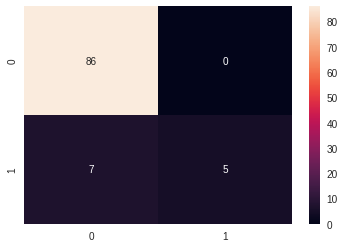

In [65]:
# confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_label,svm_label)
f = sns.heatmap(cm, annot=True, fmt='d')

In [66]:
cm

array([[86,  0],
       [ 7,  5]])

In [67]:
anomaly_svm = predict_svm[predict_svm['Anomaly'] != 0].drop('Anomaly',axis=1)
anomaly_svm.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,8.172418
32,0.432356,-0.526272,0.795491,-0.493113,8.637892
33,0.412900,-0.574391,0.827058,-0.568237,8.695015
34,0.463492,-0.562305,0.734001,-0.737032,8.338360
91,-1.535425,0.260158,-2.816451,0.535399,7.785698


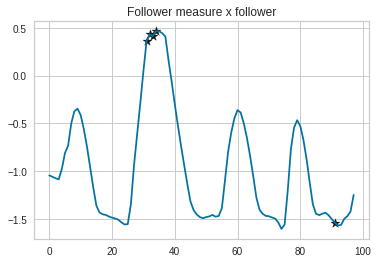

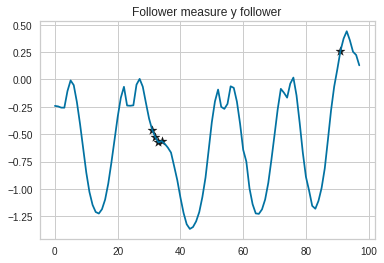

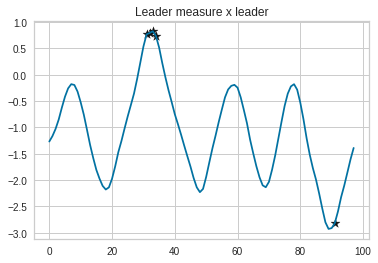

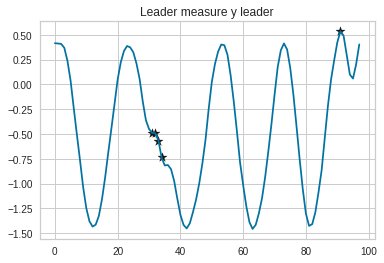

In [68]:
for column in data.columns:
    plt.plot(predict_svm[column])
    plt.scatter(anomaly_svm.index,anomaly_svm[column],c='k',marker='*',s=90,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

In [69]:
plot_model(svm, plot = 'tsne')

#DBSCAN-Model

In [70]:
data

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174
...,...,...,...,...
93,-1.559131,0.440215,-2.325538,0.295837
94,-1.496434,0.357878,-2.105013,0.098846
95,-1.467606,0.253125,-1.857816,0.058397
96,-1.420551,0.223617,-1.606946,0.202749


In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Follower_measure_x_follower  98 non-null     float64
 1   Follower_measure_y_follower  98 non-null     float64
 2   Leader_measure_x_leader      98 non-null     float64
 3   Leader_measure_y_leader      98 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [87]:
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=7)
model=clustering_DBSCAN.fit(data)
label=model.labels_

In [88]:
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0])

In [89]:
label=pd.DataFrame(label).replace(-1,1)


In [90]:
label

,0
0,0
1,0
2,0
3,0
4,0
...,...
93,1
94,1
95,0
96,0


In [91]:
target_names = ['cluster 1', 'cluster 2']
print(classification_report(y_label,label,  target_names=target_names))

              precision    recall  f1-score   support

   cluster 1       0.99      0.95      0.97        86
   cluster 2       0.73      0.92      0.81        12

    accuracy                           0.95        98
   macro avg       0.86      0.94      0.89        98
weighted avg       0.96      0.95      0.95        98



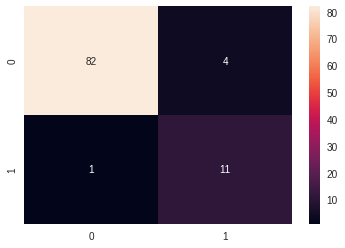

In [92]:
cm_DBSCAN = confusion_matrix(y_label,label)
f_DBSCAN = sns.heatmap(cm_DBSCAN, annot=True, fmt='d')

In [93]:
plot_model(clustering_DBSCAN, plot = 'tsne')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.817191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.613007
[t-SNE] KL divergence after 850 iterations: 0.151545


[Text(0.5, 1.0, 'data T-SNE projection')]

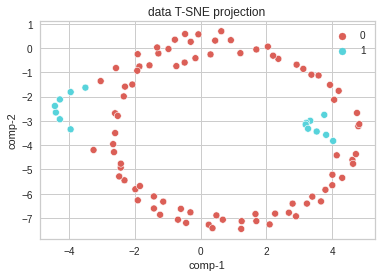

In [94]:
#plot the DBSCAN data  IN 2d T-SNE 

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(data) 
df = pd.DataFrame()
df["y"] = label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection")

# KNN-Model

In [95]:
knn = create_model('knn')
predict_knn = predict_model(knn, data = X_test)
predict_knn.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,0.440224
1,-1.056986,-0.245590,-1.165454,0.411869,0,0.417015
2,-1.071858,-0.256787,-1.028780,0.407472,0,0.415998
3,-1.084518,-0.257502,-0.850609,0.367564,0,0.364849
4,-0.974811,-0.105985,-0.625045,0.236174,0,0.347260


In [96]:
anomaly_knn = predict_knn[predict_knn['Anomaly'] != 0].drop('Anomaly',axis=1)
anomaly_knn.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly_Score
37,0.407215,-0.667258,-0.046350,-0.854807,0.770708
88,-1.431881,-0.282536,-2.802852,0.047603,0.737135


In [97]:
knn_label =  predict_knn['Anomaly']

In [98]:
print(classification_report(y_label, knn_label))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93        86
         1.0       0.50      0.08      0.14        12

    accuracy                           0.88        98
   macro avg       0.69      0.54      0.54        98
weighted avg       0.84      0.88      0.84        98



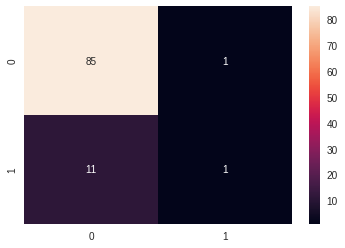

In [99]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_Knn = confusion_matrix(y_label,knn_label)
f = sns.heatmap(cm_Knn, annot=True, fmt='d')

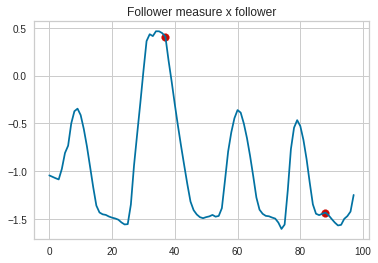

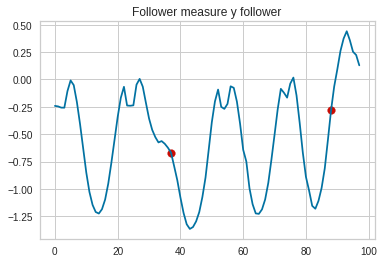

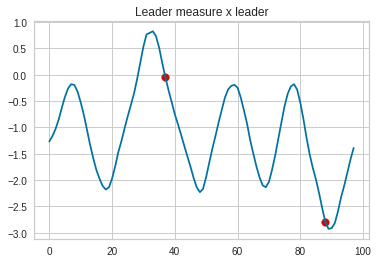

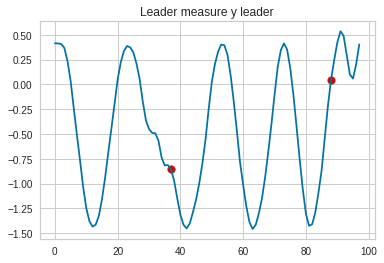

In [100]:
for column in data.columns:
    plt.plot(predict_knn[column])
    plt.scatter(anomaly_knn.index,anomaly_knn[column],c='r',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

In [101]:
plot_model(knn, plot = 'tsne')

# PCA

In [102]:
pca = create_model('pca')
predict_pca = predict_model(pca, data = X_test)
predict_pca.head()


,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,171.243668
1,-1.056986,-0.245590,-1.165454,0.411869,0,171.205205
2,-1.071858,-0.256787,-1.028780,0.407472,0,171.879672
3,-1.084518,-0.257502,-0.850609,0.367564,0,170.120084
4,-0.974811,-0.105985,-0.625045,0.236174,0,163.779848


In [103]:
anomaly_pca = predict_knn[predict_pca['Anomaly'] != 0].drop('Anomaly',axis=1)
anomaly_pca.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,0.404969
32,0.432356,-0.526272,0.795491,-0.493113,0.432588
33,0.412900,-0.574391,0.827058,-0.568237,0.400769
34,0.463492,-0.562305,0.734001,-0.737032,0.288930
35,0.462689,-0.586497,0.517651,-0.817752,0.432588


In [104]:
pca_labels =  predict_pca['Anomaly']


In [113]:
print(classification_report(y_label, pca_labels))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



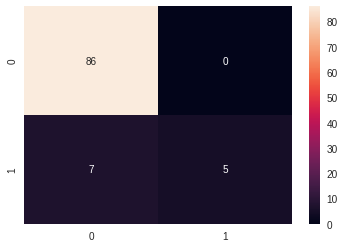

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_pca= confusion_matrix(y_label,pca_labels)
f = sns.heatmap(cm_pca, annot=True, fmt='d')


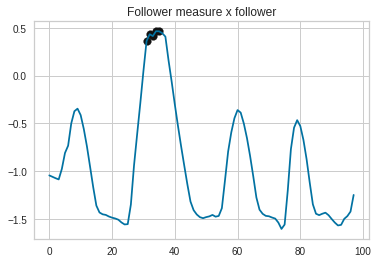

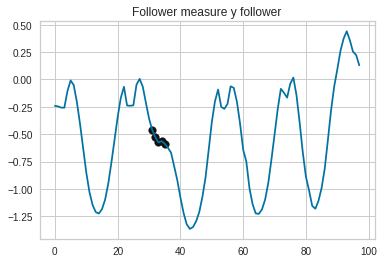

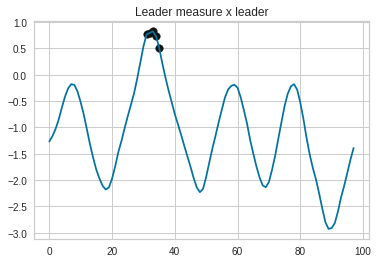

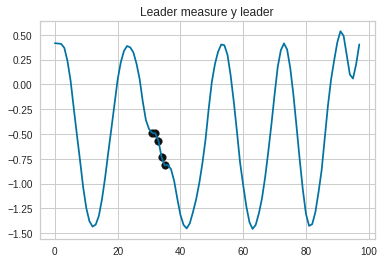

In [106]:
for column in data.columns:
    plt.plot(predict_pca[column])
    plt.scatter(anomaly_pca.index,anomaly_pca[column],c='k',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

In [107]:
plot_model(pca, plot = 'tsne')